# Support Vector Machines
- Mathematically it is the hinge loss function with L2 regularization.
- All incorrectly classified points in a model are support vectors. This creates the vector.

In [1]:

import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.30, random_state= 42)

# Select only the first two features
X = wine.data[:, :2]

y = wine.target

In [2]:
# Making the function I need later

import numpy as np
import matplotlib.pyplot as plt

def plot_classifier(X, y, clf, ax=None, ticks=False, lims=None):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    X : numpy array, shape (n_samples, 2)
        The input data.

    y : numpy array, shape (n_samples,)
        The labels for the input data.

    clf : sklearn classifier object
        The classifier to use for plotting.

    ax : matplotlib Axes object, optional
        The Axes object to plot on. If not specified, a new figure and axes
        will be created.

    ticks : bool, optional
        Whether to show ticks on the axes.

    lims : list of tuples, optional
        Limits for the axes. If not specified, the limits will be set to the
        minimum and maximum values for each dimension of the input data.

    Returns
    -------
    ax : matplotlib Axes object
        The Axes object containing the plot.
    """

    # create a meshgrid of points to evaluate the classifier at
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100),
                         np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # create a new figure and axes if necessary
    if ax is None:
        fig, ax = plt.subplots()

    # plot the decision boundaries
    ax.contourf(xx, yy, Z, alpha=0.4)

    # plot the input data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

    # set the limits for the axes
    if lims is not None:
        ax.set_xlim(*lims[:2])
        ax.set_ylim(*lims[2:])
    else:
        ax.set_xlim(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
        ax.set_ylim(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # hide the ticks on the axes if necessary
    if not ticks:
        ax.set_xticks([])
        ax.set_yticks([])

    return ax



Number of original examples 178
Number of support vectors 81


<Axes: >

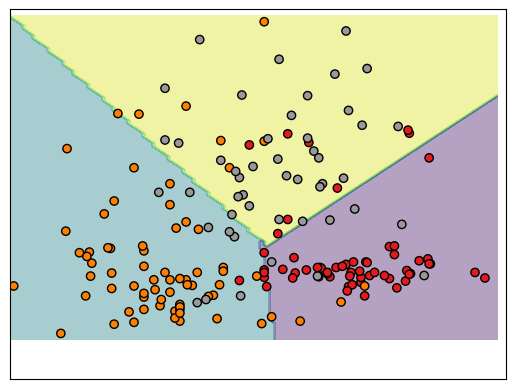

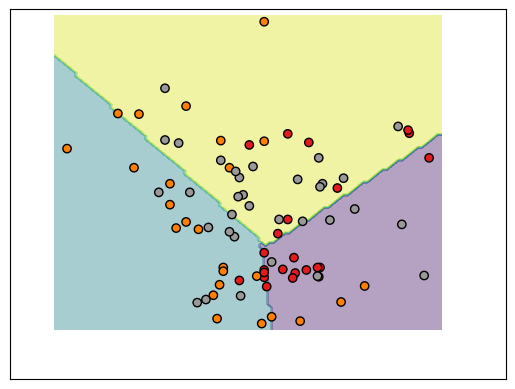

In [3]:
# Train a linear SVM on the whole dataset
svm = SVC(kernel="linear")
svm.fit(X,y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))

# svm.support_ returns the indices of the support vectors of the model svm. 
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
# We specify lims in plot_classifier() so that the two plots are forced to use 
# the same axis limits and can be compared directly.
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))


# Comparing the decision boundries of the two graphs we can see they are the same.
# By the definition of support vectors, they should be.

### Transforming Features
- transformed feature = (original feature)^2
- fitting a linear model in a transformed space corresponds to fitting a nonlinear model in the original space. 
- In general, the transformation isn't always going to be squaring and the boundary isn't always going to be an ellipse. In fact, the new space often has a different number of dimensions from the original space

In [4]:
from sklearn.svm import SVC

# The default behavior is what's called an RBF or Radial Basis Function kernel. 
# Although it's not computed this way, we can think of this as an extremely complicated transformation of the features, 
# followed by fitting a linear boundary in that new space.

# The RBF kernel also introduces a new hyperparameter, gamma, which controls the smoothness of the boundary. 
# By decreasing gamma, we can make the boundaries smoother.

svm = SVC(gamma=1)  # Default is kernel='rbf'

![Alt text](../_images/gamma.png)
<br><br>
The third image shows gamma=2. Now we've reached 100% training accuracy by creating a little "island" of blue around each blue training example. In fact, with the right hyperparameters, RBF SVMs are capable of perfectly separating almost any data set. So, why not always use the largest value of gamma and get the highest possible training accuracy? Overfitting.

### Comparing Logistic Regression and Support Vector Machine (SVM)

#### Logistic Regression
- IMPORTING: sklearn.linear_model.LogisticRegression
- Key hyperparameters in sklearn:
- - C: (inverse regularization strength)
- - penalty: (type of regularization)
- - multi_class: (type of multi-class)
- Is a linear classifier
- Can use with kernels, but slow
- Outputs meaningful probabilities
- Can be extended to multi-class
- All data points affect fit
- L2 or L1 regularization
<br><br>

#### Support Vector Machine (SVM)
- IMPORTING: sklearn.svm.SVC (for a kernel SVM, can set to no kernel but slower)
- IMPORTING: sklearn.svm.LinearSVC (non-kernel SVM, faster)
- Key hyperparameters in sklearn:
- - C: (inverse regularization strength)
- - kernel: (type of kernel)
- - gamma: (inverse RBF smoothness, lower= smooth, higher= complex)
- Is a linear classifier
- Can use with kernels, and fast
- Does not naturally output meaningful probabilities
- Can be extended to multi-class
- Only "support vectors" affect fit
- Conventionally just L2 regularization
<br><br>
#### SGDClassifier: scales well to large datasets
- Key hyperparameter
- - alpha: is like 1/C (lower= less regularization, higher= more regularization), alpha is basically the inverse of C.

```
from sklearn.linear_model import SGDClassifier

logreg = SGDClassifier(loss= 'log_loss')
linsvm = SGDClassifier(loss= 'hinge')
```